## Manifest and Metadata Creation

In [1]:
import pandas as pd 
import numpy as np

Import of the final sample dataset obtained in the EDA notebook: 

In [2]:
data = pd.read_csv('data_final_groups.csv',dtype = {"sample_name": "str","run_ids_x":"str"})
data.head(5)

,Unnamed: 0,sample_name,acid_reflux,acne_medication,acne_medication_otc,add_adhd,age_cat,age_corrected,age_years,alcohol_consumption,...,weight_units,whole_eggs,whole_grain_frequency,group,sample_names_x,biosample_ids_x,run_ids_x,sample_names_y,biosample_ids_y,run_ids_y
0,0,10317.000023139,No,No,No,No,60s,69.0,69.0,Yes,...,kilograms,Regularly (3-5 times/week),Regularly (3-5 times/week),Treatment,10317.000023,7353729,ERR2032495,10317.000023,7353729,ERR2032495
1,1,10317.000027811,No,No,No,No,40s,46.0,46.0,Yes,...,kilograms,Occasionally (1-2 times/week),Rarely (less than once/week),Treatment,10317.000028,7353735,ERR2032501,10317.000028,7353735,ERR2032501
2,2,10317.000033280,No,No,No,No,60s,60.0,60.0,Yes,...,kilograms,Occasionally (1-2 times/week),Regularly (3-5 times/week),Treatment,10317.000033,8577201,ERR2313963,10317.000033,8577201,ERR2313963
3,3,10317.000038261,No,No,No,No,40s,48.0,48.0,Yes,...,kilograms,Rarely (less than once/week),Occasionally (1-2 times/week),Treatment,10317.000038,8614208,ERR2318007,10317.000038,8614208,ERR2318007
4,4,10317.000041075,No,No,No,No,20s,25.0,25.0,No,...,kilograms,Regularly (3-5 times/week),Regularly (3-5 times/week),Treatment,10317.000041,8728556,ERR2404913,10317.000041,8728556,ERR2404913


In [3]:
data.specialized_diet_exclude_refined_sugars.value_counts()

Yes    100
No     100
Name: specialized_diet_exclude_refined_sugars, dtype: int64

Lets now create the manifest file needed to create the qiime artifacts

In [4]:
manifest = data.sample_name.to_frame()

In [5]:
manifest = manifest.rename(columns={'sample_name': 'sample-id'})

In [6]:
import os

In [7]:
# Costruiamo e teniamo solo le colonne che ci servono
manifest['absolute-filepath'] = os.getcwd()+'/good_quality_20/'+ data['run_ids_y']+'.fastq'
manifest['direction'] = 'forward'


# Scriviamo il csv

manifest.to_csv('fastq_manifest.csv', sep=',', index=False)
manifest

,sample-id,absolute-filepath,direction
0,10317.000023139,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
1,10317.000027811,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
2,10317.000033280,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
3,10317.000038261,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
4,10317.000041075,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
...,...,...,...
195,10317.000052323,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
196,10317.000052472,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
197,10317.000052511,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward
198,10317.000058850,/home/LABORATORI/gc882638/gut-microbiota-diet/...,forward


## Metadata file creation

In [8]:
metadata = data.sample_name.to_frame()

In [9]:
metadata = metadata.rename(columns={'sample_name': 'sample-id'})

In [10]:
# Aggiungiamo al manifest le informazioni riguardo l'età, il sesso e l'uso degli antibiotici
metadata['sex'] = data['sex']
metadata['age_cat'] = data['age_cat']
metadata['refined_sugars'] = data['specialized_diet_exclude_refined_sugars']
metadata

,sample-id,sex,age_cat,refined_sugars
0,10317.000023139,female,60s,Yes
1,10317.000027811,male,40s,Yes
2,10317.000033280,female,60s,Yes
3,10317.000038261,female,40s,Yes
4,10317.000041075,female,20s,Yes
...,...,...,...,...
195,10317.000052323,male,20s,No
196,10317.000052472,female,20s,No
197,10317.000052511,male,20s,No
198,10317.000058850,female,20s,No


In [11]:
metadata.refined_sugars.value_counts()

Yes    100
No     100
Name: refined_sugars, dtype: int64

In [12]:
metadata.to_csv('sample_metadata.tsv', sep='\t', index=False)

In [24]:
metadata

,sample-id,sex,age_cat,refined_sugars
0,10317.000023139,female,60s,Yes
1,10317.000027811,male,40s,Yes
2,10317.000033280,female,60s,Yes
3,10317.000038261,female,40s,Yes
4,10317.000041075,female,20s,Yes
...,...,...,...,...
195,10317.000052323,male,20s,No
196,10317.000052472,female,20s,No
197,10317.000052511,male,20s,No
198,10317.000058850,female,20s,No


In [25]:
%conda update conda
%conda install wget

^C

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.
Solving environment: \ 

In [3]:
!wget https://data.qiime2.org/distro/core/qiime2-2023.2-py38-linux-conda.yml
%conda env create -n qiime2-2023.2 --file qiime2-2023.2-py38-linux-conda.yml
%conda activate qiime2-2023.2

--2023-05-10 15:47:17--  https://data.qiime2.org/distro/core/qiime2-2023.2-py38-linux-conda.yml
Resolving data.qiime2.org (data.qiime2.org)... 54.200.1.12
Connecting to data.qiime2.org (data.qiime2.org)|54.200.1.12|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://raw.githubusercontent.com/qiime2/environment-files/master/2023.2/release/qiime2-2023.2-py38-linux-conda.yml [following]
--2023-05-10 15:47:17--  https://raw.githubusercontent.com/qiime2/environment-files/master/2023.2/release/qiime2-2023.2-py38-linux-conda.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704 (14K) [text/plain]
Saving to: ‘qiime2-2023.2-py38-linux-conda.yml’

qiime2-2023.2-py38- 100%[===================>]  14,36K  --.-KB/s    in 0s      

20

In [1]:
!qiime --help

Usage: qiime [OPTIONS] COMMAND [ARGS]...

  QIIME 2 command-line interface (q2cli)
  --------------------------------------

  To get help with QIIME 2, visit https://qiime2.org.

  To enable tab completion in Bash, run the following command or add it to
  your .bashrc/.bash_profile:

      source tab-qiime

  To enable tab completion in ZSH, run the following commands or add them to
  your .zshrc:

      autoload -Uz compinit && compinit
      autoload bashcompinit && bashcompinit
      source tab-qiime

Options:
  --version   Show the version and exit.
  --help      Show this message and exit.

Commands:
  info                Display information about current deployment.
  tools               Tools for working with QIIME 2 files.
  dev                 Utilities for developers and advanced users.
  alignment           Plugin for generating and manipulating alignments.
  composition         Plugin for compositional data analysis.
  cutadapt            Plugin for removing adapter sequen

In [14]:
from qiime2 import Artifact
import os

In [21]:
artifact_data = Artifact.import_data('SampleData[SequencesWithQuality]',
                                     os.getcwd()+'/fastq_manifest.csv',
                                     view_type='SingleEndFastqManifestPhred33')



In [22]:
artifact_data.save('artifact_data.qza')

'artifact_data.qza'

In [23]:
artifact_data = Artifact.load('artifact_data.qza')
artifact_data

<artifact: SampleData[SequencesWithQuality] uuid: 99b73eaf-6c46-4de3-a82b-0b0f534c0c43>

In [27]:
from qiime2 import Metadata
sample_metadata = Metadata.load(os.getcwd()+'/sample_metadata.tsv')

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/q2_demux/_summarize/_visualizer.py:191: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  context['result_data'] = context['result_data'].append(df)


<visualization: Visualization uuid: 5c3099aa-de3e-4571-a436-5b71dfd2fbad>

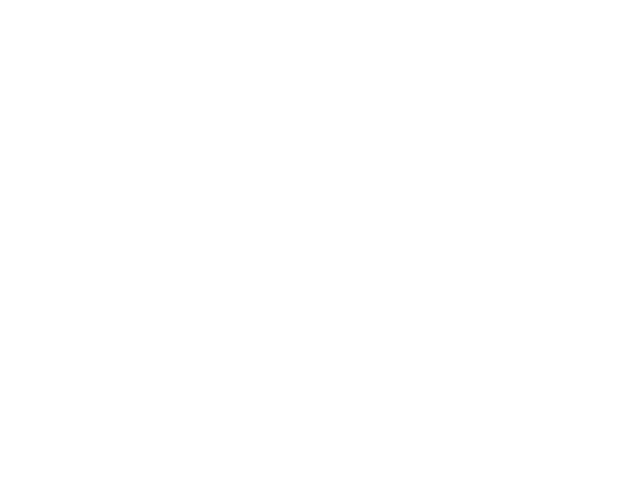

In [77]:
%matplotlib widget 
from qiime2.plugins import demux as demux
demux_summary = demux.visualizers.summarize(artifact_data)
demux_summary.visualization

In [79]:
from qiime2.plugins import demux
demux_sequences = demux.methods.emp_single(artifact_data,sample_metadata.get_column("sample-id")) 

ValueError: 'sample-id' is not a column in the metadata. Available columns: 'sex', 'age_cat', 'refined_sugars'

Deblur

In [80]:
from qiime2.plugins import deblur

deblur_seq = deblur.methods.denoise_16S(artifact_data,
                                        trim_length=-1,
                                        sample_stats=True)

deblur_seq.table.save("deblur_seq_table.qza")
deblur_seq.representative_sequences.save("deblur_seq_representative_sequences.qza")
deblur_seq.stats.save("deblur_sequences_stats.qza")

print(deblur_seq)

/opt/anaconda3/envs/qiime2-2023.2/bin/deblur:534: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn('deblur version %s workflow started on %s' %
/opt/anaconda3/envs/qiime2-2023.2/bin/deblur:536: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn('parameters: %s' % locals())
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/deblur/workflow.py:147: UserWarning: Vast majority of sequences (42 / 42) are shorter than the trim length (151). Are you using the correct -t trim length?
  warnings.warn(errmsg, UserWarning)
/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/deblur/workflow.py:847: UserWarning: Problem removing artifacts from file /tmp/qiime2/gc882638/data/dec93988-16f3-4ce7-b1ba-ccda0d84d158/data/10317.000029560_130_L001_R1_001.fastq.gz
  warnings.warn('Problem removing artifacts from file %s' %
/opt/anaconda3/envs/qiime2-2023.2/bin/deblur:637: DeprecationWarning: The 'warn' method 

Results (name = value)
---------------------------------------------------------------------------------------------------------
table                    = <artifact: FeatureTable[Frequency] uuid: e4743a4e-e7ea-49ba-aecd-0a444032e91b>
representative_sequences = <artifact: FeatureData[Sequence] uuid: 621290bd-b2e1-43ef-ad6c-18c226e02b9a>
stats                    = <artifact: DeblurStats uuid: 0048b796-f00f-4cd7-bd9c-57fc64fda661>


In [30]:
deblur_seq_table = Artifact.load("deblur_seq_table.qza")
deblur_seq_representative_sequencess = Artifact.load("deblur_seq_representative_sequences.qza")
deblur_seq_stats = Artifact.load("deblur_sequences_stats.qza")

In [33]:
deblur_seq_table.view(pd.DataFrame)

,9132071c6a76ae971f847adc316f0af8,0b93c7207d6f38b6b3ce1efc7c32d08b,e8d5562e9761500b0d5c551299053ede,feb2e37114daa6d2f4387811e83850ba,7497619a223e3d586a4db1ef7b8b7f18,712eb5e5c53f61d93729575e90dd3c1b,1815597849cf47548b8456c4c080f334,ebc62fd8bcdee9280a1cea01ddf72857,6e1cb7d96328daae48add07f12f59c75,b001f14c07e9bfda25fe0264bc3bea9c,...,37537b35f6ce7785b2a314b867a8fd53,00550cc33827d59226ab5ed888b04740,4bd2e0ed406a82ed1e12052f3f8b1d5b,061c209a1adcba533d33417c27da495e,82766de6fa14ccdd3317054eb50833e5,a2f620c4ef961fd3218fd0cdd41e20a0,a0c7ddf80da66b4d38a2f9a27e469dc1,c18417d29d0fb7e2a2cf20aae0bd44e2,f1c375a92d5f4961d109c73d1ff30385,f710be30a82bb92658c8350b9c9676f1
10317.000054059,1236.0,129.0,77.0,39.0,37.0,25.0,23.0,22.0,21.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000063573,39.0,0.0,0.0,6.0,0.0,0.0,0.0,133.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000030452,1209.0,0.0,0.0,37.0,0.0,0.0,0.0,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000068165,11.0,0.0,0.0,103.0,0.0,0.0,0.0,251.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000108496,17.0,0.0,0.0,40.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000071913,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000063234,17.0,30.0,0.0,27.0,0.0,29.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000052437,8157.0,0.0,15.0,18.0,0.0,0.0,9.0,669.0,0.0,0.0,...,57.0,55.0,27.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000052472,1784.0,0.0,94.0,99.0,0.0,0.0,0.0,109.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,11.0,10.0,0.0,0.0,0.0


In [17]:
deblur_seq_df = deblur_seq_table.view(pd.DataFrame).reset_index().melt(id_vars=["index"],
                                                                       var_name="feature",
                                                                       value_name="value").\
                                                                       rename(columns={"index":"id"})


In [20]:
deblur_seq_df.id

0         10317.000054059
1         10317.000063573
2         10317.000030452
3         10317.000068165
4         10317.000108496
               ...       
163120    10317.000071913
163121    10317.000063234
163122    10317.000052437
163123    10317.000052472
163124    10317.000033290
Name: id, Length: 163125, dtype: object

In [83]:
from qiime2.plugins import feature_table

In [84]:
deblur_table = feature_table.visualizers.summarize(deblur_seq.table)
deblur_table.visualization.save("deblur_table")

'deblur_table.qzv'